In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from tqdm import tqdm_notebook

np.set_printoptions(2, suppress=True)

%matplotlib inline

In [2]:
α = 0.4
λ = 0.1
k = 4

A = np.random.random((30, 8))

sparsity = 0.6

f = np.vectorize(lambda x: np.nan if x < sparsity else (x - sparsity)*5/(1-sparsity))
ratings = f(A)
ratings

array([[4.35,  nan,  nan, 3.07,  nan,  nan,  nan,  nan],
       [ nan, 3.84, 1.44, 2.63, 1.3 , 4.36, 2.1 ,  nan],
       [3.05, 0.92, 0.26,  nan, 4.07,  nan,  nan,  nan],
       [4.83, 0.39,  nan, 4.77, 1.51, 3.97,  nan,  nan],
       [3.63,  nan,  nan,  nan, 2.18,  nan, 3.44,  nan],
       [2.86, 3.13,  nan,  nan,  nan, 2.6 ,  nan, 1.63],
       [ nan,  nan,  nan, 0.45, 1.32, 1.2 ,  nan,  nan],
       [4.25,  nan,  nan,  nan,  nan,  nan, 3.61,  nan],
       [ nan,  nan,  nan, 1.56,  nan, 1.18,  nan, 0.9 ],
       [ nan,  nan,  nan, 2.37,  nan, 2.76, 3.19,  nan],
       [2.01,  nan, 2.2 , 1.81,  nan, 2.  , 4.84,  nan],
       [1.82,  nan, 2.1 , 0.99, 3.07, 0.62,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 0.58],
       [ nan,  nan, 2.95,  nan,  nan,  nan,  nan,  nan],
       [ nan, 3.59,  nan, 4.65, 4.42,  nan,  nan,  nan],
       [ nan,  nan,  nan,  nan,  nan,  nan,  nan, 2.44],
       [0.39, 4.22, 0.94,  nan,  nan,  nan,  nan, 1.19],
       [ nan, 4.03, 4.81, 0.4 ,

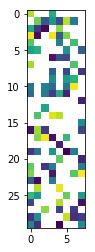

In [3]:
plt.imshow(ratings)

![img](pictures/p_ui.png)

In [4]:
A[A < sparsity] = 0

R_ui = (A > 0).astype('int')

R_ui

array([[1, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 1, 1, 0],
       [1, 1, 1, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 0, 1, 1, 0],
       [1, 0, 1, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 1, 0, 1, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [1, 1, 1, 0, 0, 0, 0, 1],
       [0, 1, 1, 1, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 1, 0, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 1],
       [1, 0, 1, 1, 0, 0, 0, 1],
       [1, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 1, 0, 0, 0, 0],
       [0, 1, 0, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 1, 0, 1],
       [1, 0, 0, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 1, 0, 1, 0],
       [1, 1, 0, 0, 0, 1, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 1]])

![img](confidence.png)

In [5]:
C_ui = 1 + α*A
C_ui

array([[1.38, 1.  , 1.  , 1.34, 1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.36, 1.29, 1.32, 1.28, 1.38, 1.31, 1.  ],
       [1.34, 1.27, 1.25, 1.  , 1.37, 1.  , 1.  , 1.  ],
       [1.39, 1.25, 1.  , 1.39, 1.29, 1.37, 1.  , 1.  ],
       [1.36, 1.  , 1.  , 1.  , 1.31, 1.  , 1.35, 1.  ],
       [1.33, 1.34, 1.  , 1.  , 1.  , 1.32, 1.  , 1.29],
       [1.  , 1.  , 1.  , 1.25, 1.28, 1.28, 1.  , 1.  ],
       [1.38, 1.  , 1.  , 1.  , 1.  , 1.  , 1.36, 1.  ],
       [1.  , 1.  , 1.  , 1.29, 1.  , 1.28, 1.  , 1.27],
       [1.  , 1.  , 1.  , 1.32, 1.  , 1.33, 1.34, 1.  ],
       [1.3 , 1.  , 1.31, 1.3 , 1.  , 1.3 , 1.39, 1.  ],
       [1.3 , 1.  , 1.31, 1.27, 1.34, 1.26, 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.26],
       [1.  , 1.  , 1.33, 1.  , 1.  , 1.  , 1.  , 1.  ],
       [1.  , 1.35, 1.  , 1.39, 1.38, 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.32],
       [1.25, 1.37, 1.27, 1.  , 1.  , 1.  , 1.  , 1.28],
       [1.  , 1.37, 1.39, 1.25,

In [6]:
X = np.random.random((A.shape[0], k)) * 5 / (3 * 5 * 5)
X

array([[0.06, 0.06, 0.05, 0.01],
       [0.02, 0.01, 0.01, 0.  ],
       [0.04, 0.02, 0.03, 0.  ],
       [0.03, 0.01, 0.  , 0.01],
       [0.05, 0.  , 0.03, 0.06],
       [0.04, 0.03, 0.01, 0.03],
       [0.03, 0.04, 0.03, 0.05],
       [0.07, 0.05, 0.04, 0.05],
       [0.01, 0.04, 0.04, 0.02],
       [0.03, 0.06, 0.05, 0.04],
       [0.04, 0.  , 0.02, 0.01],
       [0.04, 0.  , 0.05, 0.04],
       [0.04, 0.06, 0.06, 0.05],
       [0.03, 0.03, 0.05, 0.04],
       [0.02, 0.01, 0.03, 0.03],
       [0.02, 0.02, 0.06, 0.01],
       [0.02, 0.  , 0.05, 0.06],
       [0.03, 0.04, 0.06, 0.05],
       [0.03, 0.03, 0.04, 0.01],
       [0.02, 0.04, 0.01, 0.  ],
       [0.02, 0.04, 0.03, 0.04],
       [0.04, 0.05, 0.05, 0.03],
       [0.01, 0.03, 0.04, 0.06],
       [0.03, 0.04, 0.04, 0.06],
       [0.  , 0.01, 0.04, 0.06],
       [0.03, 0.05, 0.04, 0.02],
       [0.03, 0.02, 0.05, 0.05],
       [0.01, 0.06, 0.01, 0.04],
       [0.05, 0.03, 0.06, 0.03],
       [0.03, 0.  , 0.03, 0.06]])

In [7]:
Y = np.random.random((A.shape[1], k)) * 5 / (3 * 5 * 5)
Y

array([[0.01, 0.01, 0.05, 0.02],
       [0.01, 0.02, 0.04, 0.06],
       [0.05, 0.02, 0.02, 0.03],
       [0.06, 0.04, 0.05, 0.02],
       [0.04, 0.05, 0.05, 0.04],
       [0.03, 0.06, 0.02, 0.01],
       [0.03, 0.04, 0.03, 0.04],
       [0.05, 0.06, 0.02, 0.02]])

![img](pictures/x_u.png)

In [8]:
def minimise_x(X):
    X_new = np.zeros(X.shape)
    for (u, x_u) in enumerate(X):
        pu = R_ui[u]
        Cu = np.diag(C_ui[u])
        inv = np.linalg.inv(Y.T @ Cu @ Y + λ*np.eye(Y.shape[1]))
        x_u_new = inv @ Y.T @ Cu @ pu

        X_new[u] = x_u_new
    
    return X_new
        
        
minimise_x(X)

array([[0.62, 0.32, 1.08, 0.39],
       [1.9 , 1.99, 1.8 , 1.85],
       [0.85, 0.76, 1.59, 1.46],
       [1.2 , 1.54, 2.07, 1.39],
       [0.64, 0.9 , 1.29, 1.05],
       [0.78, 1.28, 1.29, 1.05],
       [1.08, 1.36, 1.06, 0.58],
       [0.36, 0.41, 0.82, 0.68],
       [1.24, 1.41, 0.76, 0.36],
       [1.13, 1.3 , 0.83, 0.64],
       [1.62, 1.38, 1.5 , 1.13],
       [1.58, 1.45, 1.75, 1.07],
       [0.45, 0.54, 0.16, 0.16],
       [0.5 , 0.11, 0.14, 0.28],
       [0.96, 1.  , 1.41, 1.18],
       [0.47, 0.57, 0.17, 0.16],
       [1.  , 0.8 , 1.25, 1.26],
       [1.36, 1.16, 1.15, 1.11],
       [0.29, 0.49, 0.48, 0.38],
       [1.18, 1.39, 1.75, 1.43],
       [0.75, 1.06, 0.67, 0.56],
       [1.51, 0.96, 1.33, 0.8 ],
       [1.36, 1.27, 1.41, 0.98],
       [0.65, 0.46, 1.42, 0.95],
       [0.37, 0.69, 0.95, 1.05],
       [0.8 , 1.31, 1.3 , 1.06],
       [0.78, 1.05, 1.22, 0.78],
       [1.09, 0.97, 0.82, 1.07],
       [1.07, 1.65, 1.45, 1.43],
       [0.82, 1.17, 1.58, 1.33]])

![img](pictures/y_i.png)

In [9]:
def minimise_y(Y):
    Y_new = np.zeros(Y.shape)
    for (i, y_i) in enumerate(Y):
        pi = R_ui[:,i]
        Ci = np.diag(C_ui[:,i])
        inv = np.linalg.inv(X.T @ Ci @ X + λ*np.eye(X.shape[1]))
        y_i_new = inv @ X.T @ Ci @ pi

        Y_new[i] = y_i_new
    
    return Y_new
    
minimise_y(Y)

array([[3.86, 1.77, 2.68, 2.7 ],
       [2.03, 1.18, 2.07, 2.25],
       [1.74, 0.86, 1.81, 1.21],
       [2.31, 2.48, 2.14, 1.8 ],
       [2.06, 0.83, 1.78, 2.72],
       [2.28, 2.11, 1.67, 1.15],
       [1.77, 1.81, 1.  , 1.32],
       [1.4 , 1.7 , 2.79, 2.33]])

![img](pictures/cost_function.png)

In [10]:
def cost_fun(A, X, Y):
    _cost = 0
    for u, i in np.ndindex(A.shape):
        c_ui = C_ui[u, i]
        p_ui = R_ui[u, i]
        x_u = X[u]
        y_i = Y[i]
        _cost += c_ui*((p_ui - x_u.T @ y_i)**2)
    _cost += λ*np.sum(np.linalg.norm(X, axis=1))
    _cost += λ*np.sum(np.linalg.norm(Y, axis=1))
    
    return _cost
cost_fun(A, X, Y)

129.52682538498283

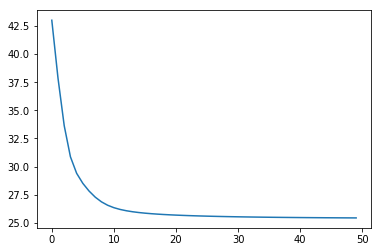

In [11]:
costs = []
for _ in range(50):
    X = minimise_x(X)
    Y = minimise_y(Y)
    cost = cost_fun(A, X, Y)
    costs.append(cost)
    
plt.plot(costs)

In [12]:
X @ Y.T

array([[ 0.58,  0.19,  0.28,  0.54, -0.01,  0.46,  0.49,  0.28],
       [ 0.56,  0.77,  0.87,  1.18,  1.02,  0.94,  0.61, -0.26],
       [ 0.74,  0.73,  0.61,  0.24,  1.28,  0.14,  0.22,  0.36],
       [ 0.67,  1.15,  0.48,  0.93,  0.85,  0.95,  0.16,  0.31],
       [ 0.83, -0.01,  0.69,  0.15,  0.81, -0.13,  0.74,  0.27],
       [ 0.91,  0.98, -0.07,  0.44,  0.04,  0.71, -0.04,  1.1 ],
       [ 0.11,  0.65,  0.42,  0.8 ,  0.61,  0.72,  0.14, -0.3 ],
       [ 0.78, -0.25,  0.4 ,  0.21,  0.02,  0.02,  0.78,  0.39],
       [ 0.49,  0.58, -0.03,  0.71, -0.34,  0.84,  0.15,  0.48],
       [ 0.33,  0.08,  0.38,  1.02, -0.26,  0.85,  0.69, -0.21],
       [ 0.9 ,  0.1 ,  0.75,  1.14,  0.11,  0.84,  1.15,  0.07],
       [ 0.74,  0.61,  0.8 ,  0.95,  0.91,  0.72,  0.68, -0.  ],
       [ 0.43,  0.17, -0.14, -0.16, -0.11, -0.03, -0.03,  0.64],
       [ 0.15, -0.07,  0.32,  0.14,  0.34, -0.01,  0.31, -0.16],
       [ 0.14,  0.9 ,  0.36,  0.56,  0.93,  0.57, -0.13, -0.11],
       [ 0.43,  0.18, -0.

Download the Movie Lens 100K dataset from [here](https://grouplens.org/datasets/movielens/100k/) in the project folder. On Unix systems you can do this with

```sh
wget http://files.grouplens.org/datasets/movielens/ml-100k.zip
unzip ml-100k.zip
```

After unzipping the file the following should work.

In [13]:
! cat ml-100k/u.info

943 users
1682 items
100000 ratings


In [14]:
cols_raw = "movie id | movie title | release date | video release date | IMDb URL | unknown | Action | Adventure | Animation | Children's | Comedy | Crime | Documentary | " + \
"Drama | Fantasy | Film-Noir | Horror | Musical | Mystery | Romance | Sci-Fi | Thriller | War | Western "

cols = [col.strip() for col in cols_raw.split('|')]
cols

pd.read_table('ml-100k/u.item', sep='|', encoding='latin-1', names=cols)

,movie id,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995),0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [15]:
cols = [col.strip() for col in "user id | item id | rating | timestamp".split('|')]
df = pd.read_table('ml-100k/ua.base', sep='\t', encoding='latin-1', names=cols)
df['date'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()

,user id,item id,rating,timestamp,date
0,1,1,5,874965758,1997-09-22 22:02:38
1,1,2,3,876893171,1997-10-15 05:26:11
2,1,3,4,878542960,1997-11-03 07:42:40
3,1,4,3,876893119,1997-10-15 05:25:19
4,1,5,3,889751712,1998-03-13 01:15:12


In [16]:
ratings_df = df.pivot(index='user id', columns='item id', values='rating')
ratings_df

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,5.0,3.0,4.0,3.0,3.0,5.0,4.0,1.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4.0,NaN,NaN,NaN,NaN,NaN,2.0,4.0,4.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,5.0,NaN,NaN,5.0,5.0,5.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


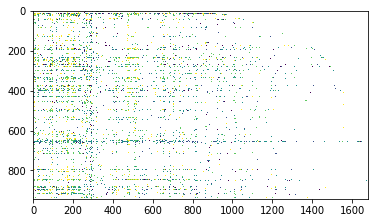

In [17]:
plt.imshow(ratings_df)

In [18]:
class ALSModel:
    def __init__(self, numiter=50):
        self.numiter = numiter
        self.α = 0.4
        self.λ = 10
        self.k = 10

    def _minimise_x(self):
        for u in tqdm_notebook(range(len((self.X))), desc='X '):
            pu = self.R_ui[u]
            Cu = np.diag(self.C_ui[u])
            inv = np.linalg.inv(self.Y.T @ Cu @ self.Y + self.λ*np.eye(self.k))
            x_u_new = inv @ self.Y.T @ Cu @ pu

            self.X[u] = x_u_new
    
    def _minimise_y(self):
        for i in tqdm_notebook(range(len(self.Y)), desc='Y'):
            pi = self.R_ui[:,i]
            Ci = np.diag(self.C_ui[:,i])
            inv = np.linalg.inv(self.X.T @ Ci @ self.X + self.λ*np.eye(self.k))
            y_i_new = inv @ self.X.T @ Ci @ pi

            self.Y[i] = y_i_new
    
    def fit(self, A):
        self.A = A.copy()
        self.R_ui = (~np.isnan(self.A)).astype('int')
        self.C_ui = 1 + self.α*self.R_ui
  
        self.X = np.random.random((self.A.shape[0], self.k))*5
        self.Y = np.random.random((self.A.shape[1], self.k))*5
        for i in range(self.numiter):
            print(f'Iteration {i+1}')
            self._minimise_x()
            self._minimise_y()
        print('Done fitting')
        
    def get_ratings(self):
        return self.X @ self.Y.T

A = np.array(ratings_df)
als = ALSModel(numiter=3)
als.fit(A)

Iteration 1


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Iteration 2


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Iteration 3


HBox(children=(IntProgress(value=0, description='X ', max=943), HTML(value='')))

HBox(children=(IntProgress(value=0, description='Y', max=1680), HTML(value='')))


Done fitting


In [19]:
new_A = als.get_ratings()
pd.DataFrame(data=new_A, index=ratings_df.index, columns=ratings_df.columns)

item id,1,2,3,4,5,6,7,8,9,10,...,1673,1674,1675,1676,1677,1678,1679,1680,1681,1682
user id,,,,,,,,,,,,,,,,,,,,,
1,1.015143,0.614375,0.463014,0.887053,0.314376,0.122257,1.091232,0.696800,0.609776,0.334903,...,-0.003077,0.003146,0.003275,0.003275,0.007243,-0.003521,-0.003521,-0.003521,0.006676,0.016161
2,0.415298,-0.015782,0.085575,0.061552,-0.029460,0.066670,0.286284,0.151686,0.344483,0.137035,...,0.000134,-0.001182,0.002400,0.002400,0.004292,0.007058,0.007058,0.007058,-0.001953,-0.003493
3,0.001333,0.050246,-0.000966,0.031396,0.036180,0.035671,0.069896,0.010088,0.049573,0.054072,...,0.000381,-0.001828,0.004486,0.004486,-0.001498,0.012887,0.012887,0.012887,0.000827,-0.002276
4,0.040307,0.038965,-0.009419,0.018324,0.009093,0.001698,0.039089,0.012914,0.013390,0.000520,...,0.000389,-0.000599,0.001909,0.001909,-0.000932,0.004797,0.004797,0.004797,0.000270,-0.001721
5,0.497715,0.553047,0.241149,0.580799,0.246754,-0.006959,0.436457,0.355767,0.168650,0.103804,...,-0.003591,0.000013,0.001071,0.001071,-0.003342,-0.003407,-0.003407,-0.003407,0.005614,0.007371
6,0.926965,0.116871,0.124272,0.534861,0.021841,0.166735,0.782040,0.680507,0.793485,0.406441,...,0.004709,0.014298,-0.000090,-0.000090,0.011930,-0.002597,-0.002597,-0.002597,0.000341,0.001799
7,0.548449,0.557724,0.106529,0.763489,0.656811,0.055804,0.833060,0.664477,0.683839,0.373347,...,0.010066,0.012719,-0.000284,-0.000284,0.002846,0.002323,0.002323,0.002323,0.025546,0.005656
8,0.304649,0.255473,-0.003364,0.204221,0.062772,-0.027846,0.282570,0.144350,0.027945,-0.007663,...,0.000660,0.001373,0.002486,0.002486,-0.001314,0.004118,0.004118,0.004118,0.003712,-0.001417
9,0.113449,0.015513,0.007246,0.026782,0.014547,0.001334,0.098917,0.050737,0.072977,0.012702,...,0.000933,0.000397,0.000180,0.000180,0.001101,0.000465,0.000465,0.000465,0.000851,-0.000571


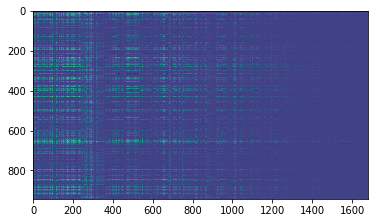

In [20]:
plt.imshow(new_A)